In [20]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import torch
import torchvision.transforms as transforms

In [21]:
img = np.array(Image.open("data/train/NIR/imgset0594/HR.png"))

(384, 384)


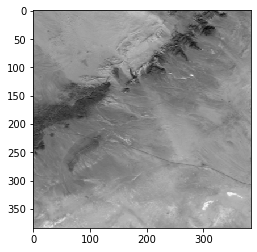

In [22]:
print(img.shape)
plt.imshow(img, cmap='gray')

In [23]:
from data import *  

In [24]:
oof = TrainNIRDataset(upsample=True)

In [25]:
print(oof[0]['LR'].shape)

torch.Size([1, 9, 384, 384])


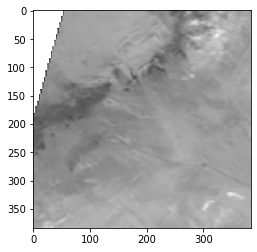

In [26]:
plt.imshow(oof[0]['LR'][0][0], cmap='gray')

In [27]:
print(oof[0]['LR'][0][0])

tensor([[10615, 10609, 10602,  ...,  8025,  8020,  8012],
        [10600, 10592, 10580,  ...,  8068,  8064,  8057],
        [10579, 10566, 10537,  ...,  8180,  8178,  8173],
        ...,
        [10476, 10430, 10317,  ..., 10802, 10851, 10872],
        [10471, 10432, 10337,  ..., 10734, 10784, 10806],
        [10481, 10444, 10355,  ..., 10708, 10759, 10781]], dtype=torch.int32)


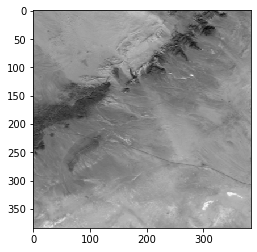

In [28]:
plt.imshow(oof[0]['HR'], cmap='gray')

In [29]:
oof2 = torch.utils.data.DataLoader(oof, batch_size=32, shuffle=False, num_workers=0)
oof3 = iter(oof2)

In [30]:
# print(next(iter(oof2)))
print(next(oof3)['LR'].shape)

torch.Size([32, 1, 9, 384, 384])
